In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df_train = pd.read_pickle("./data/data_v2_train.pickle")
X = np.array([list(v) for v in df_train.TFIDF], dtype='float32')
y = np.array([list(l) for l in df_train.label])
N, x_dim = X.shape
_, n_classes = y.shape
X.shape, y.shape

((11228, 2000), (11228, 34))

In [7]:
import torch
from torch.utils.data import TensorDataset, DataLoader, random_split

batch_size = 10000//2
X, y = torch.Tensor(X), torch.Tensor(y)
dataset = TensorDataset(X, y)
train_dataset, valid_dataset = random_split(dataset, [10000, 1228])
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=1228, shuffle=True)

In [8]:
from torch import nn

class Model(nn.Module):
    def __init__(self, dims, dropout): #Nlabels will be 10 in our case
        super().__init__()

        self.layers = nn.ModuleList()
        for k in range(len(dims)-1):
            self.layers.append(nn.Linear(dims[k], dims[k+1]))
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)
        self.logsoftmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        # Pass the input tensor through each of our operations
        for layer in self.layers[:-1]:
          x = layer(x)
          x = self.dropout(x)
          x = self.relu(x)
        x = self.layers[-1](x)
        # x = self.logsoftmax(x)
        return x

Training interrupted at epoch: 25


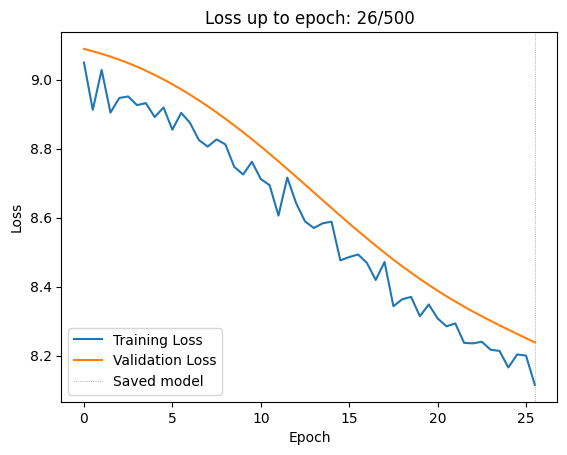

Loaded best model weights!
Total training time: 16.28634524345398 s
Final train loss: 8.114744186401367
Final valid loss: 8.238093376159668


In [9]:
import train
# from importlib import reload
# reload(train)

n_epochs = 500
batch_logging_freq = 1

model = Model([x_dim, 64, n_classes], dropout=0.5)

trainer = train.Trainer(model, epochs=n_epochs, criterion=nn.CrossEntropyLoss(),
                  optim=torch.optim.Adam, lr=1e-3, stopping_batches=10,
                  batch_logging_freq = batch_logging_freq, use_cuda=False)
trainer.train(train_loader, valid_loader)